In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import warnings
import seaborn as sns

In [3]:
df = pd.read_csv("matches.csv")

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [6]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
df.drop('umpire3',axis =1,inplace = True)

In [8]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
df["toss_winner"].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

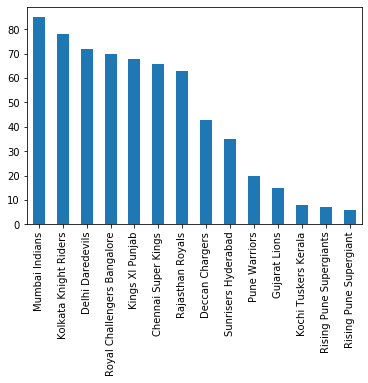

In [10]:
df["toss_winner"].value_counts().plot(kind="bar")
plt.show()

Most No of Tosses won in IPL is by Mumbai Indians

In [11]:
df["winner"].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

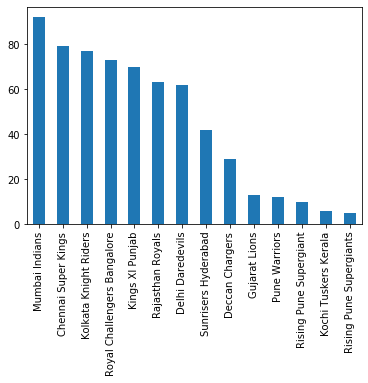

In [12]:
df["winner"].value_counts().plot(kind="bar")
plt.show()

Most No of Matches Won in IPL is by Mumbai Indians

In [15]:
df.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.471087,0.024281,-0.010263,-0.015510
season,0.471087,1.000000,0.004170,-0.016815,-0.000708
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000


In [12]:
df1 = pd.read_csv("deliveries.csv")

In [13]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [17]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

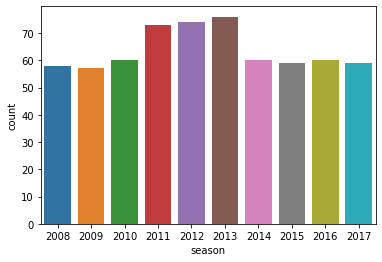

In [47]:
sns.countplot(df["season"],data=df)
plt.show()

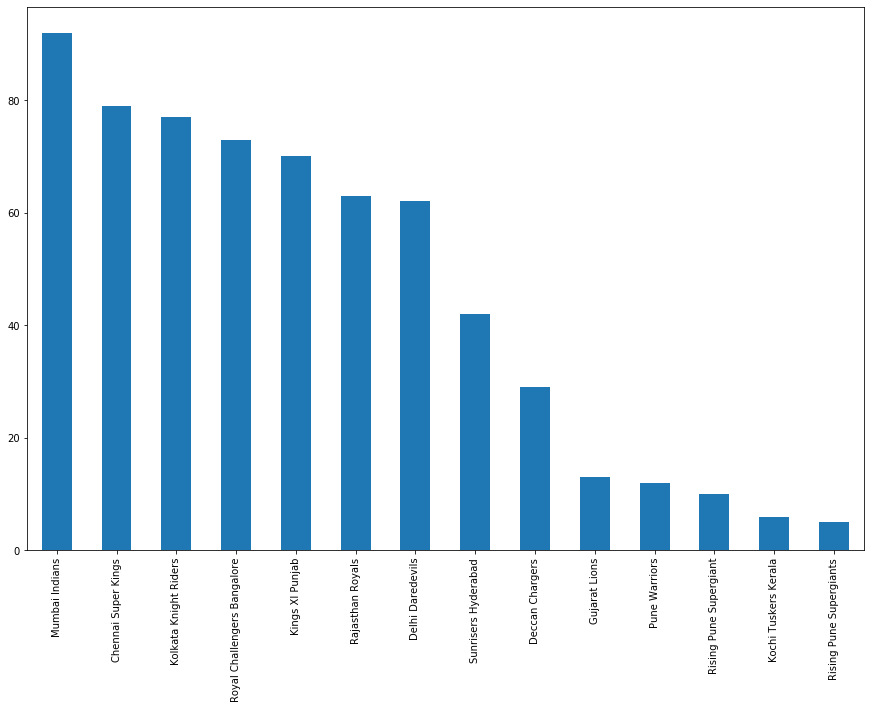

In [16]:
fig, axes = plt.subplots(1,1,figsize = (15,10))
df["winner"].value_counts().plot(kind="bar")
plt.show()

In [48]:
df["player_of_match"].value_counts().head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64

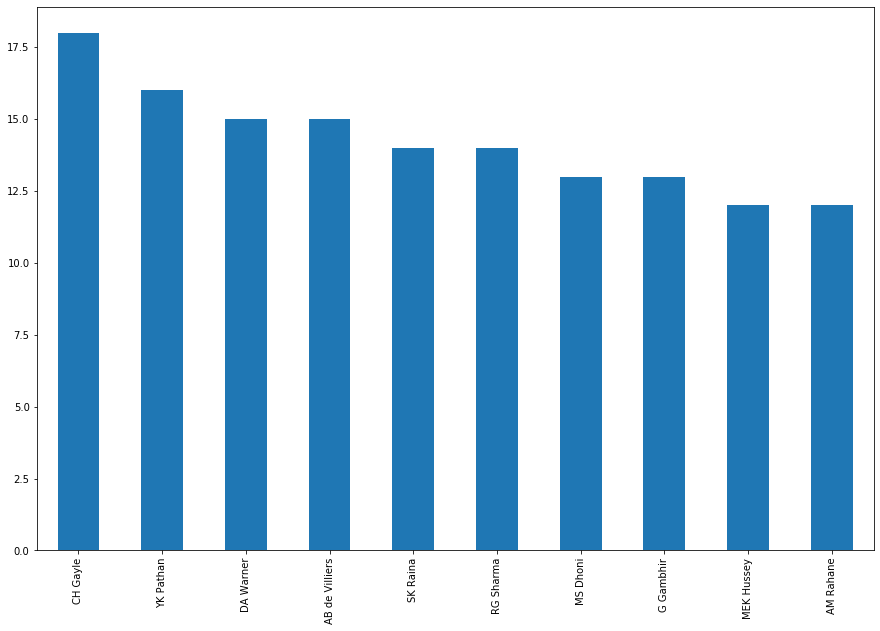

In [45]:
df["player_of_match"].value_counts().head(10).plot(kind = "bar", figsize= (15,10))
plt.show()

Chris Gayle has won most no of Man of the Match Awards

In [25]:
df["city"].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64

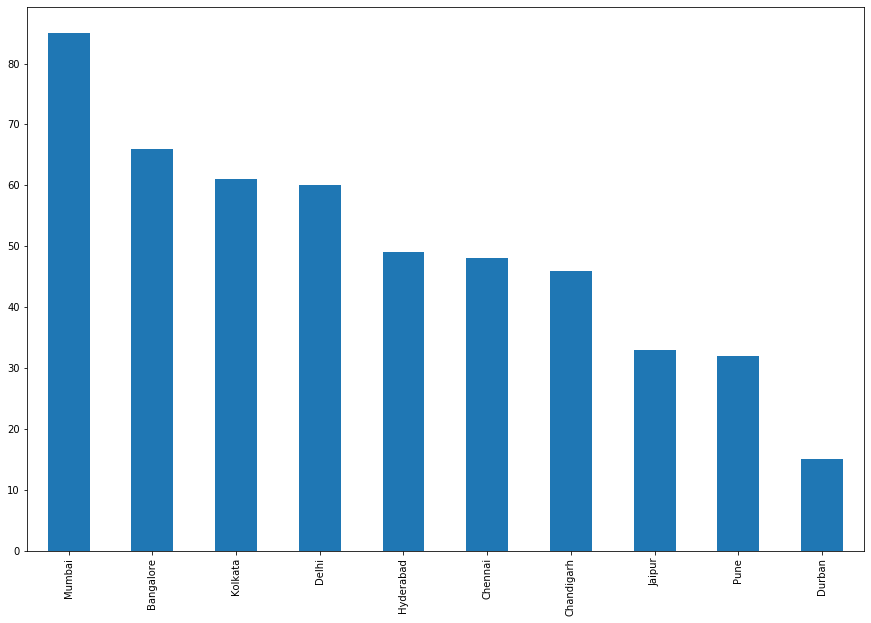

In [43]:
df["city"].value_counts().head(10).plot(kind = "bar",figsize = (15,10))
plt.show()

Most of no of matches played in a city is Mumbai

In [27]:
df["venue"].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Maharashtra Cricket Association Stadium                 15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Punjab Cricket Association IS Bindra Stadium, Mohali    

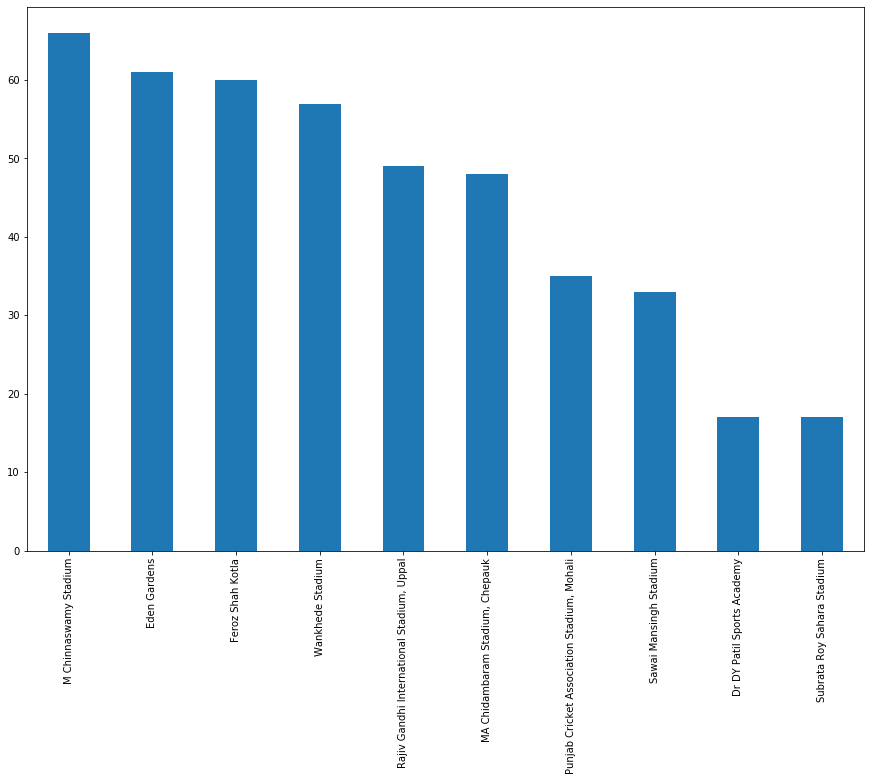

In [50]:
df["venue"].value_counts().head(10).plot(kind = "bar",figsize = (15,10))
plt.show()

Most no of matches played in a Stadiun is M Chinnaswamy Stadium, Bangalore

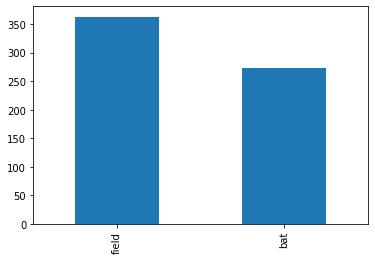

In [32]:
df["toss_decision"].value_counts().plot(kind = "bar")
plt.show()

Team winning the toss mostly choose to field first.

In [52]:
df.groupby("season")["winner"].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

In [53]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [54]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [57]:
a = df1.groupby("batsman")["total_runs"].sum()

In [61]:
b = a.sort_values(ascending = False).head(10)

In [62]:
b

batsman
SK Raina          4745
V Kohli           4588
G Gambhir         4388
RG Sharma         4334
DA Warner         4213
RV Uthappa        4004
CH Gayle          3914
S Dhawan          3754
MS Dhoni          3728
AB de Villiers    3621
Name: total_runs, dtype: int64

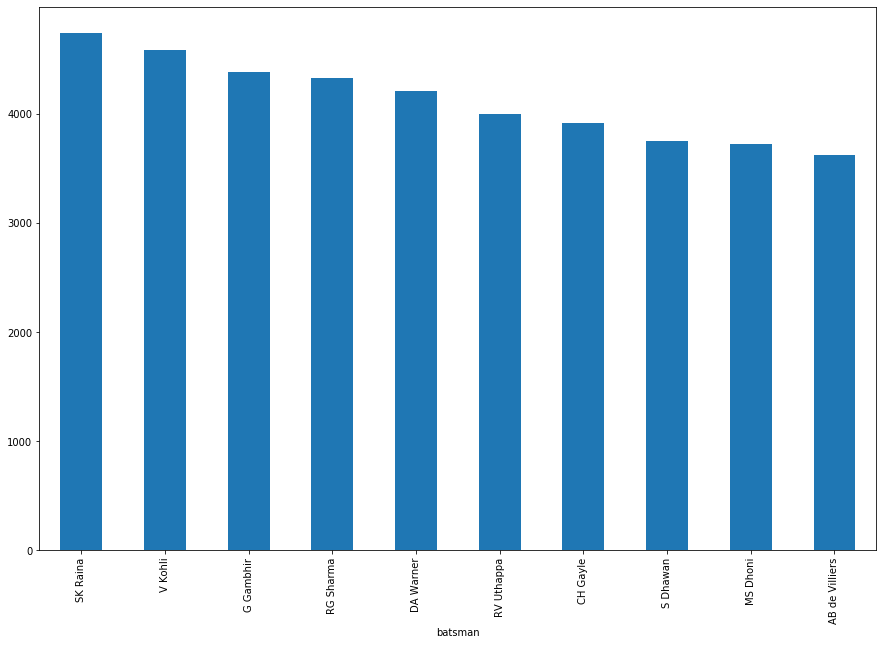

In [65]:
b.plot(kind = "bar",figsize = (15,10))
plt.show()

Most runs scored overall in all seasons of IPL is by Suresh Raina.

In [66]:
df1["player_dismissed"].value_counts()

SK Raina           134
G Gambhir          131
RG Sharma          129
RV Uthappa         128
V Kohli            118
                  ... 
Karanveer Singh      1
A Choudhary          1
TM Srivastava        1
Sandeep Sharma       1
M Ntini              1
Name: player_dismissed, Length: 436, dtype: int64

In [69]:
df1.groupby("bowler")["player_dismissed"].value_counts()

bowler          player_dismissed
A Ashish Reddy  RV Uthappa          3
                V Kohli             2
                DJG Sammy           1
                F du Plessis        1
                G Gambhir           1
                                   ..
Z Khan          UT Yadav            1
                VS Malik            1
                Vishnu Vinod        1
                W Jaffer            1
                YK Pathan           1
Name: player_dismissed, Length: 6056, dtype: int64

In [81]:
a1 = df1.groupby("bowler")["total_runs"].value_counts()
a1

bowler          total_runs
A Ashish Reddy  1             117
                0              79
                4              26
                2              25
                6              20
                             ... 
Z Khan          4             319
                2             146
                6              64
                3               9
                5               4
Name: total_runs, Length: 2070, dtype: int64

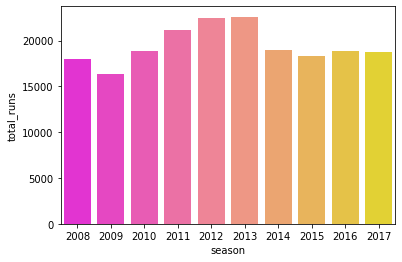

In [86]:
batsmen = df[['id','season']].merge(df1, left_on = 'id', right_on = 'match_id', 
                                         how = 'left').drop('id', axis = 1)
season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()
sns.barplot(x = 'season', y = 'total_runs', data = season,palette='spring')
plt.show()

In [87]:
df1["batsman_runs"].value_counts()

0    61148
1    55497
4    17033
2     9705
6     6523
3      509
5       45
Name: batsman_runs, dtype: int64

In [115]:
four = df1[(df1["batsman_runs"]==4)]["batting_team"].value_counts().reset_index()
four

,index,batting_team
0,Mumbai Indians,2145
1,Kings XI Punjab,2083
2,Kolkata Knight Riders,1978
3,Royal Challengers Bangalore,1978
4,Delhi Daredevils,1970
5,Chennai Super Kings,1770
6,Rajasthan Royals,1630
7,Sunrisers Hyderabad,999
8,Deccan Chargers,957
9,Pune Warriors,525


In [116]:
six = df1[(df1["batsman_runs"]==6)]["batting_team"].value_counts().reset_index()
six

,index,batting_team
0,Royal Challengers Bangalore,935
1,Mumbai Indians,876
2,Kings XI Punjab,762
3,Chennai Super Kings,742
4,Delhi Daredevils,686
5,Kolkata Knight Riders,659
6,Rajasthan Royals,538
7,Deccan Chargers,400
8,Sunrisers Hyderabad,364
9,Pune Warriors,196


In [108]:
bound = six + four
bound.values

array([2512, 1357, 2656,  615, 2845,  223, 2637, 3021,  721, 2168,  286,
        239, 2913, 1363], dtype=int64)

In [114]:
bound.index

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'],
      dtype='object')

In [137]:
bound = six.merge(four,left_on = "index",right_on = "index")
bound

,index,batting_team_x,batting_team_y
0,Royal Challengers Bangalore,935,1978
1,Mumbai Indians,876,2145
2,Kings XI Punjab,762,2083
3,Chennai Super Kings,742,1770
4,Delhi Daredevils,686,1970
5,Kolkata Knight Riders,659,1978
6,Rajasthan Royals,538,1630
7,Deccan Chargers,400,957
8,Sunrisers Hyderabad,364,999
9,Pune Warriors,196,525


In [139]:
bound.columns

Index(['index', 'batting_team_x', 'batting_team_y'], dtype='object')

In [156]:
bound.columns = ['Team Name',"6","4"]

In [157]:
bound

,Team Name,6,4
0,Royal Challengers Bangalore,935,1978
1,Mumbai Indians,876,2145
2,Kings XI Punjab,762,2083
3,Chennai Super Kings,742,1770
4,Delhi Daredevils,686,1970
5,Kolkata Knight Riders,659,1978
6,Rajasthan Royals,538,1630
7,Deccan Chargers,400,957
8,Sunrisers Hyderabad,364,999
9,Pune Warriors,196,525


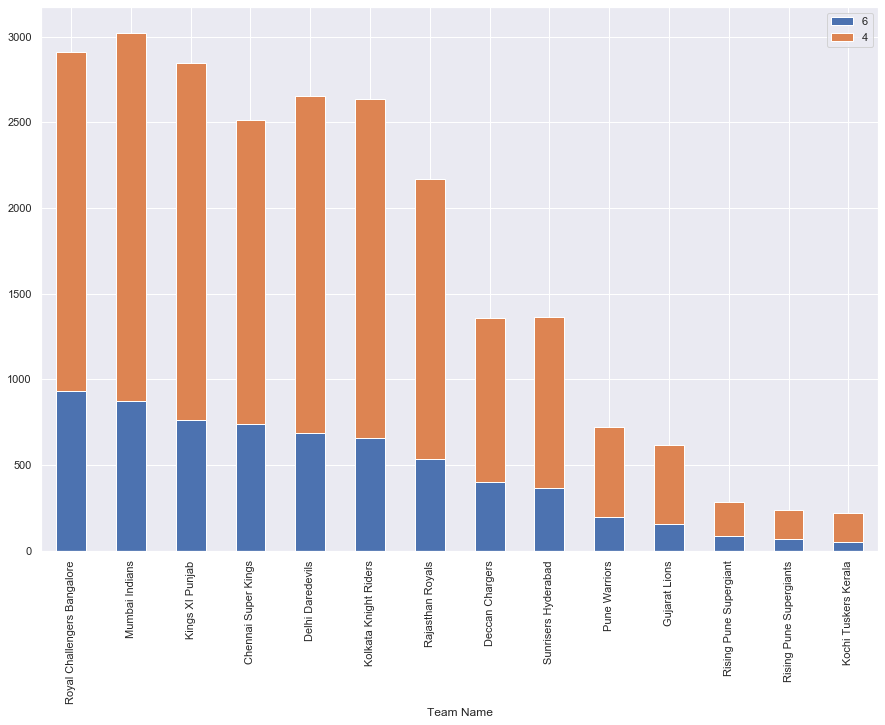

In [162]:
bound.set_index("Team Name").plot(kind="bar",stacked = True,figsize = (15,10))
plt.show()

Mumbai Indians has hit more no of boundaries overall till now.